# Classification

In [ ]:
#test change

# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import pandas as %pdb
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classifcation"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Decision Trees

## Select and prepare data

In [1]:
# Import libraries
import pandas as pd

# read the dataset
diabetes = pd.read_csv("https://raw.githubusercontent.com/VAWi-DataScience/Data-Science-and-Machine-Learning/main/Lecture/Data/diabetes.csv")

# Show top 5-records
diabetes.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
#Spliting dataset in two parts: feature set and target label
feature_set = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree','skin']
X = diabetes[feature_set]
y = diabetes.label

## Split dataset

In [3]:
# Partition data into training and testing set
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Train decicion tree model


In [4]:
# Import Decision Tree model
from sklearn.tree import DecisionTreeClassifier
# Create a Decision Tree classifier object
clf_tree = DecisionTreeClassifier(random_state=42, min_samples_leaf = 0.04)

# Train the model using training dataset
clf_tree = clf_tree.fit(X_train,y_train)


## Evaluate decision tree model (training data)

### Visualization the decision tree

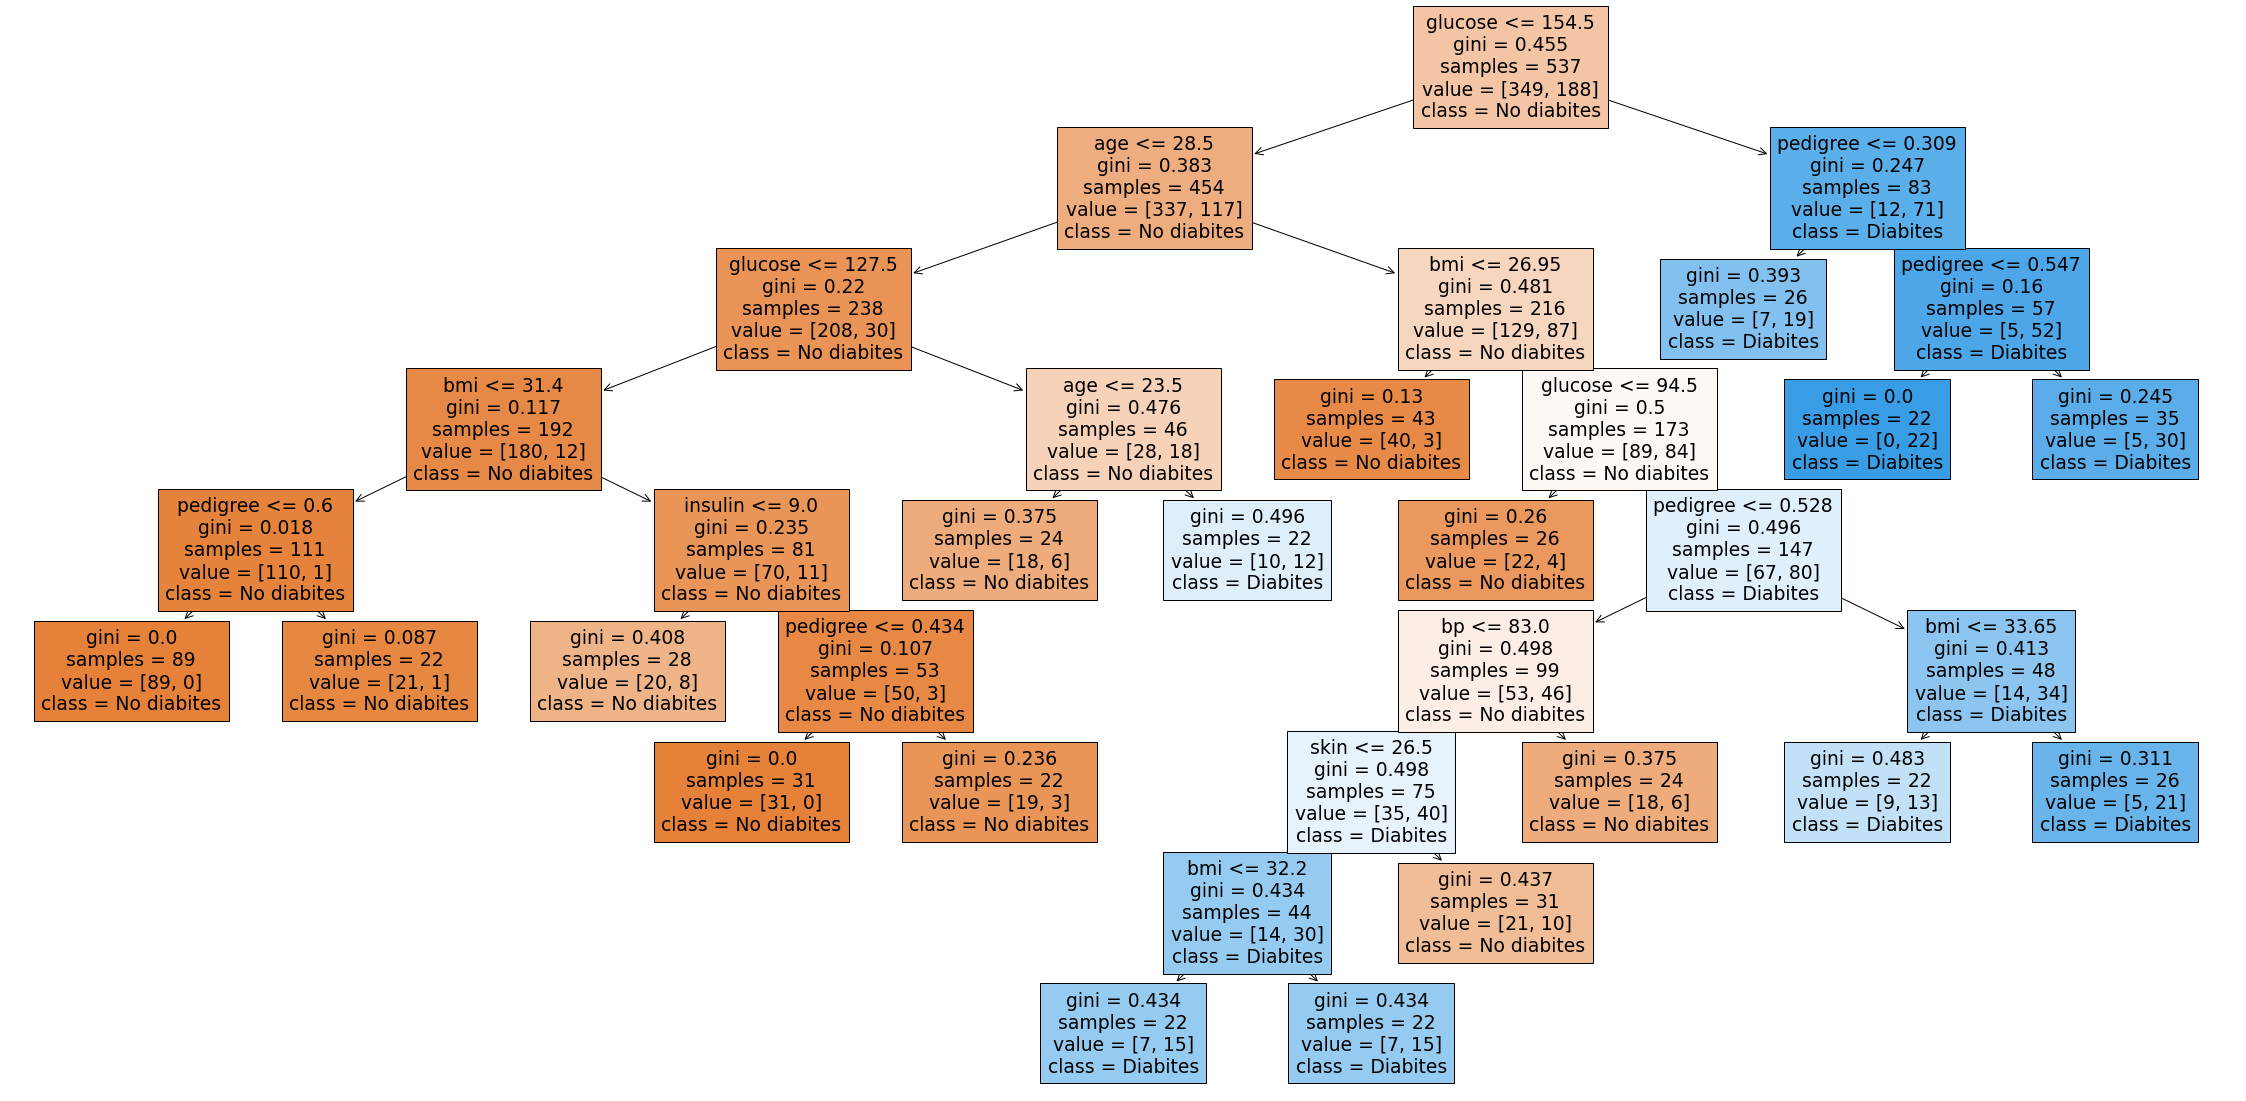

In [5]:
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(40,20))  # customize according to the size of your tree
_ = tree.plot_tree(clf_tree,feature_names = X_train.columns, filled=True, class_names= ["No diabites","Diabites"])
plt.show()

### Confusion matrix (training data)

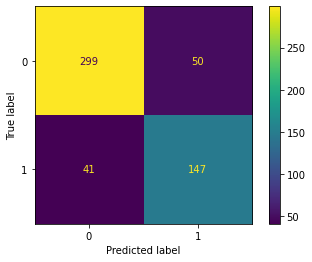

In [6]:
# Import the confusion matrix
from sklearn.metrics import plot_confusion_matrix

# Plot Confusion matrix
plot_confusion_matrix(clf_tree , X_train, y_train, values_format='d')


In [7]:
import numpy as np
# Predict the response for training dataset
y_pred_train = clf_tree.predict(X_train)
np.sum(np.equal(y_train, y_pred_train)) / len(y_train)

0.8305400372439479

# Classifier Evaluation
## Evaluate decision tree model (test data)
### Confusion matrix (test data)

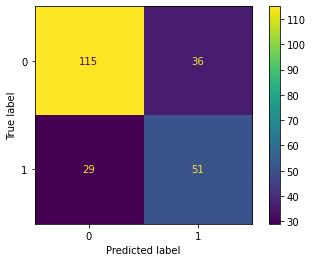

In [8]:
# Predict the response for test dataset
y_pred_test = clf_tree.predict(X_test)

# Import the confusion matrix
from sklearn.metrics import plot_confusion_matrix

# Plot Confusion matrix
plot_confusion_matrix(clf_tree , X_test, y_test, values_format='d')


In [11]:
import numpy as np
np.sum(np.equal(y_test, y_pred_test)) / len(y_pred_test)

0.7186147186147186

### Performance metrics

In [12]:
# Import metrics module for performance evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
# Calculate model accuracy
print("Accuracy:",accuracy_score(y_test, y_pred_test))
# Calculate model precision
print("Precision:",precision_score(y_test, y_pred_test))
# Calculate model recall
print("Recall:",recall_score(y_test, y_pred_test))
# Calculate model f1 score
print("F1-Score:",f1_score(y_test, y_pred_test))


Accuracy: 0.7186147186147186
Precision: 0.5862068965517241
Recall: 0.6375
F1-Score: 0.6107784431137724


# k-Nearest Neighbors (kNN)

## Select and prepare data

In [1]:
# Import libraries
import pandas as pd

# read the dataset
diabetes = pd.read_csv("https://raw.githubusercontent.com/VAWi-DataScience/Data-Science-and-Machine-Learning/main/Lecture/Data/diabetes.csv")

# Show top 5-records
diabetes.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
#Spliting dataset in two parts: feature set and y label
feature_set = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree','skin']
X = diabetes[feature_set]
y = diabetes.label

## Split dataset

In [3]:
# Partition data into training and testing set
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [6]:
from sklearn.preprocessing import StandardScaler
# scale the data
scaler = StandardScaler()
scaler.fit(X_train) #fit the Scaler only with training data, so that the test data does not influence the Scaler
X_train_scaled = scaler.transform(X_train) 
X_test_scaled = scaler.transform(X_test) #Test data is also scaled, but the Scaler is only fitted with the training data
pd.DataFrame(X_train_scaled)

,0,1,2,3,4,5,6,7
0,-0.836294,-0.189732,-1.060153,-0.948610,-0.800051,-0.535764,-0.614216,-0.157146
1,0.390728,2.130203,0.646467,-0.434667,-0.490543,0.128044,-0.909738,0.553619
2,-1.143050,1.478536,1.355371,-0.777296,0.437979,-0.093226,-0.306991,1.393614
3,0.083972,0.748669,0.147609,-0.434667,0.314176,-0.093226,-0.906812,0.036699
4,-0.836294,0.027491,1.486650,-0.006380,-0.552445,-2.195284,-0.839515,1.135154
...,...,...,...,...,...,...,...,...
532,0.390728,0.522758,-0.443144,-0.605981,0.561782,-0.314495,-0.172397,0.941309
533,-0.836294,-0.693688,-1.257071,-0.520324,-0.769100,2.893910,-0.769292,-1.320215
534,1.924505,-0.693688,1.788590,0.421906,-0.614346,0.902486,1.948921,1.070539
535,-1.143050,-0.693688,1.368499,-0.349009,0.623683,-3.854804,-0.775144,-1.320215


## Train kNN model

In [8]:
# Import KNN model
from sklearn.neighbors import KNeighborsClassifier

# Create a KNN classifier object
clf_kNN = KNeighborsClassifier(n_neighbors=3)

# Train the model using the training dataset
clf_kNN.fit(X_train_scaled,y_train)

KNeighborsClassifier(n_neighbors=3)

## Evaluate KNN model (training dataset)

In [10]:
# Predict the y variable for train dataset
y_pred_train_knn = clf_kNN.predict(X_train_scaled)

# Import metrics module for performance evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# Calculate model accuracy
print("Accuracy:",accuracy_score(y_train, y_pred_train_knn))
# Calculate model precision
print("Precision:",precision_score(y_train, y_pred_train_knn))
# Calculate model recall
print("Recall:",recall_score(y_train, y_pred_train_knn))
# Calculate model f1 score
print("F1-Score:",f1_score(y_train, y_pred_train_knn))

Accuracy: 0.8584729981378026
Precision: 0.8333333333333334
Recall: 0.7446808510638298
F1-Score: 0.7865168539325842


## Evaluate KNN model (test dataset)

In [11]:
# Predict the y variable for test dataset
y_pred_test_knn = clf_kNN.predict(X_test_scaled)

# Import metrics module for performance evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# Calculate model accuracy
print("Accuracy:",accuracy_score(y_test, y_pred_test_knn))
# Calculate model precision
print("Precision:",precision_score(y_test, y_pred_test_knn))
# Calculate model recall
print("Recall:",recall_score(y_test, y_pred_test_knn))
# Calculate model f1 score
print("F1-Score:",f1_score(y_test, y_pred_test_knn))

Accuracy: 0.70995670995671
Precision: 0.5970149253731343
Recall: 0.5
F1-Score: 0.5442176870748299


## The right number for k

In [12]:
accuracy = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_scaled, y_train)
    pred_i = knn.predict(X_test_scaled)
    accuracy.append(accuracy_score(y_test, pred_i))

Text(0, 0.5, 'Accuracy')

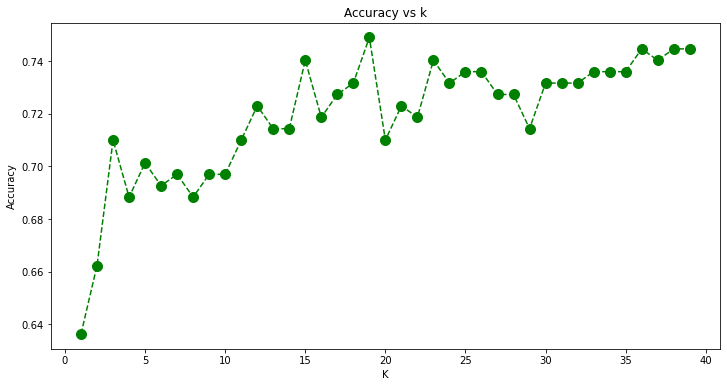

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), accuracy, color='green', linestyle='dashed', marker='o',
         markerfacecolor='green', markersize=10)
plt.title('Accuracy vs k')
plt.xlabel('K')
plt.ylabel('Accuracy')

# Naive Bayes

## Select and prepare data

In [ ]:
# Import libraries
import pandas as pd

# read the dataset
diabetes = pd.read_csv("https://raw.githubusercontent.com/VAWi-DataScience/Data-Science-and-Machine-Learning/main/Lecture/Data/diabetes.csv")

# Show top 5-records
diabetes.head()

In [26]:
#Spliting dataset in two parts: feature set and y label
feature_set = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree', 'skin']
X = diabetes[feature_set]
y = diabetes.label

## Split dataset

In [ ]:
# Partition data into training and testing set
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Train naive bayes model

In [27]:
# Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

# Create a Gaussian Classifier
clf_gnb = GaussianNB()
 
# Train the model using the training sets
clf_gnb.fit(X_train,y_train)


GaussianNB()

## Evaluate naive bayes model (training data)

In [29]:
# Predict the y variable for the test dataset
y_pred_train_gnb = clf_gnb.predict(X_train)

# Import metrics module for performance evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
 
# Calculate model accuracy
print("Accuracy:",accuracy_score(y_train, y_pred_train_gnb))
# Calculate model precision
print("Precision:",precision_score(y_train, y_pred_train_gnb))
# Calculate model recall
print("Recall:",recall_score(y_train, y_pred_train_gnb))
# Calculate model f1 score
print("F1-Score:",f1_score(y_train, y_pred_train_gnb))

Accuracy: 0.7672253258845437
Precision: 0.7006369426751592
Recall: 0.5851063829787234
F1-Score: 0.6376811594202899


## Evaluate naive bayes model (test data)

In [30]:
# Predict the y variable for the test dataset
y_pred_test_gnb = clf_gnb.predict(X_test)

# Import metrics module for performance evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
 
# Calculate model accuracy
print("Accuracy:",accuracy_score(y_test, y_pred_test_gnb))
# Calculate model precision
print("Precision:",precision_score(y_test, y_pred_test_gnb))
# Calculate model recall
print("Recall:",recall_score(y_test, y_pred_test_gnb))
# Calculate model f1 score
print("F1-Score:",f1_score(y_test, y_pred_test_gnb))

Accuracy: 0.7445887445887446
Precision: 0.6235294117647059
Recall: 0.6625
F1-Score: 0.6424242424242423


# Logistic Regression

## Select and prepare data

In [45]:
# Import libraries
import pandas as pd

# read the dataset
diabetes = pd.read_csv("https://raw.githubusercontent.com/VAWi-DataScience/Data-Science-and-Machine-Learning/main/Lecture/Data/diabetes.csv")

# Show top 5-records
diabetes.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [46]:
#Spliting dataset in two parts: feature set and y label
feature_set = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree','skin']
X = diabetes[feature_set]
y = diabetes.label

## Split dataset

In [47]:
#partition data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Train logistic regression model

In [36]:
# import logistic regression scikit-learn model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score # for performance evaluation

# instantiate the model
clf_logr = LogisticRegression(solver='lbfgs',max_iter=500)

# fit the model with data
clf_logr.fit(X_train,y_train)

LogisticRegression(max_iter=500)

## Evaluate logistic regression model (training data)

In [37]:
# Predict the response for train dataset
y_pred_train_logr = clf_logr.predict(X_train)

# Import metrics module for performance evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
# Calculate model accuracy
print("Accuracy:",accuracy_score(y_train, y_pred_train_logr))
# Calculate model precision
print("Precision:",precision_score(y_train, y_pred_train_logr))
# Calculate model recall
print("Recall:",recall_score(y_train, y_pred_train_logr))
# Calculate model f1 score
print("F1-Score:",f1_score(y_train, y_pred_train_logr))


Accuracy: 0.7839851024208566
Precision: 0.7432432432432432
Recall: 0.5851063829787234
F1-Score: 0.6547619047619048


## Evaluate logistic regression model (test data)

In [38]:
# Predict the response for test dataset
y_pred_test_logr = clf_logr.predict(X_test)

# Import metrics module for performance evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
# Calculate model accuracy
print("Accuracy:",accuracy_score(y_test, y_pred_test_logr))
# Calculate model precision
print("Precision:",precision_score(y_test, y_pred_test_logr))
# Calculate model recall
print("Recall:",recall_score(y_test, y_pred_test_logr))
# Calculate model f1 score
print("F1-Score:",f1_score(y_test, y_pred_test_logr))


Accuracy: 0.7359307359307359
Precision: 0.6172839506172839
Recall: 0.625
F1-Score: 0.6211180124223602


# Advanced Classifier Evaluation
### ROC and AUC (Decicion Tree)

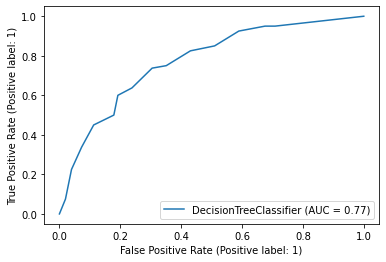

In [32]:
# import plot_roc_curve
from sklearn.metrics import plot_roc_curve

plot_roc_curve(clf_tree , X_test, y_test)

In [15]:
# import ROC AUC score
from sklearn.metrics import roc_auc_score

# Compute the area under ROC curve
auc = roc_auc_score(y_test, y_pred_test)

# Print auc value
print("Area Under Curve:",auc)

Area Under Curve: 0.699544701986755


### ROC and AUC (kNN)

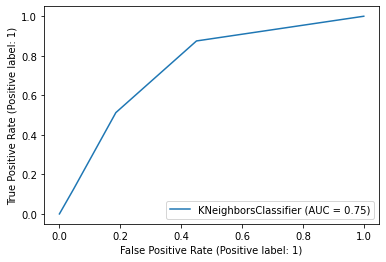

In [23]:
# import plot_roc_curve
from sklearn.metrics import plot_roc_curve
plot_roc_curve(clf_kNN , X_test_scaled, y_test_scaled)

In [25]:
# import ROC AUC score
from sklearn.metrics import roc_auc_score

# Compute the area under ROC curve
auc = roc_auc_score(y_test_scaled, y_pred_test_knn)

# Print auc value
print("Area Under Curve:",auc)

Area Under Curve: 0.6635347682119205


### ROC and AUC (GNB)

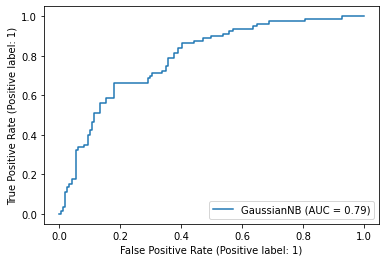

In [33]:
# import plot_roc_curve
from sklearn.metrics import plot_roc_curve
plot_roc_curve(clf_gnb , X_test, y_test)

In [39]:
# import ROC AUC score
from sklearn.metrics import roc_auc_score

# Compute the area under ROC curve
auc = roc_auc_score(y_test, y_pred_test_gnb)

# Print auc value
print("Area Under Curve:",auc)

Area Under Curve: 0.7252897350993377


### ROC and AUC (LogReg)

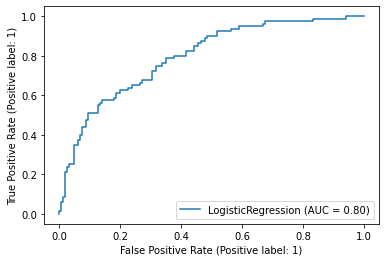

In [41]:
# import plot_roc_curve
from sklearn.metrics import plot_roc_curve
plot_roc_curve(clf_logr , X_test, y_test)

In [42]:
# import ROC AUC score
from sklearn.metrics import roc_auc_score

# Compute the area under ROC curve
auc = roc_auc_score(y_test, y_pred_test_logr)

# Print auc value
print("Area Under Curve:",auc)

Area Under Curve: 0.7098509933774835


### ROC and AUC (all Classifier)

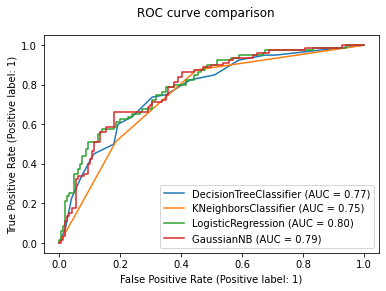

In [53]:
fig = plot_roc_curve(clf_tree , X_test, y_test)
fig = plot_roc_curve(clf_kNN , X_test_scaled, y_test_scaled, ax = fig.ax_)
fig = plot_roc_curve( clf_logr, X_test, y_test,ax = fig.ax_)
fig = plot_roc_curve( clf_gnb, X_test, y_test,ax = fig.ax_)
fig.figure_.suptitle("ROC curve comparison")
plt.show() 